# Data Preparation

In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from typing import List
sb.set()

In [23]:
def get_dataset_raw() -> pd.DataFrame:
    dataset_folder_path: str = "dataset"
    dataset_name: str = "Course_info.csv"
    csv_data: pd.DataFrame = pd.read_csv(f"{dataset_folder_path}/{dataset_name}")

    # Assign the features to the correct datatype
    csv_data['id'] = csv_data['id'].astype(int)
    csv_data['num_subscribers'] = csv_data['num_subscribers'].astype(int)
    csv_data['num_reviews'] = csv_data['num_reviews'].astype(int)
    csv_data['num_comments'] = csv_data['num_comments'].astype(int)
    csv_data['num_lectures'] = csv_data['num_lectures'].astype(int)
    csv_data['content_length_min'] = csv_data['content_length_min'].astype(int)
    csv_data['published_time'] = pd.to_datetime(csv_data['published_time'])
    csv_data['last_update_date'] = pd.to_datetime(csv_data['last_update_date'])
    
    return csv_data

# Data clean up

In [24]:
def clean_up_dataset(dataframe: pd.DataFrame) -> pd.DataFrame:
    total_rows = dataframe.shape[0]
    print(f"Total samples: {total_rows}")

    # total_duplicated_ids = dataframe[dataframe.duplicated('id', keep=False)]
    # print(f"Course with duplicated ids: {len(total_duplicated_ids)}")
    #add condition if there is duplicates

    # display the null values for each column
    print(dataframe.isnull().sum())
    
    # for column in dataframe.columns:
    #     print(f"{column}: {type(column)} -> {dataframe[column].dtype}, {dataframe[column].isnull().sum()}")

    #     if dataframe[column].isnull().sum() == 0:
    #         continue
        
    #     if pd.api.types.is_datetime64_dtype(dataframe[column]):
    #         print(f"is_datetime64")
    #         dataframe[column].fillna(value="NoUpdates")
    
    return dataframe

In [25]:
def generate_numerical_visualization(dataframe: pd.DataFrame):
    
    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    # numerical_dataframe.info()

    figure, axes = plt.subplots(len(numerical_dataframe.columns), 3, figsize=(24,24))
    count = 0

    for column in numerical_dataframe.columns:
        
        sb.boxplot(data=numerical_dataframe[column], orient='h', ax=axes[count,0])
        sb.histplot(data=numerical_dataframe[column], ax=axes[count,1])
        sb.violinplot(data=numerical_dataframe[column], orient='h', ax=axes[count,2])
        count = count + 1

In [26]:
def remove_outliers(dataframe: pd.DataFrame) -> pd.DataFrame:

    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])

    for column in numerical_dataframe.columns:

        column_data: pd.core.series.Series = numerical_dataframe[column]
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        interquartile_range = q3-q1

        lower_whisker = q1-1.5*interquartile_range
        upper_whisker = q3+1.5*interquartile_range
        outliers = sum( (dataframe[column] < lower_whisker) | (dataframe[column] > upper_whisker) )
        print(f"[{column}] total outliers: { outliers }")

    return dataframe

In [27]:
# def generate_caterogical_visualization(dataframe: pd.DataFrame):
    

# Test Functions

In [28]:
DatasetRaw = get_dataset_raw()
DatasetRaw.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231,3.75,134,42,37,1268,2010-08-05 22:06:13+00:00,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474,4.50,709,112,9,88,2010-01-12 18:09:46+00:00,NaT,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713,4.40,41,13,14,82,2010-10-13 18:07:17+00:00,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988,4.80,395,88,36,1511,2011-06-20 20:08:38+00:00,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266,4.75,38,12,38,569,2011-06-23 18:31:20+00:00,NaT,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [29]:
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  209734 non-null  int64              
 1   title               209734 non-null  object             
 2   is_paid             209734 non-null  bool               
 3   price               209734 non-null  float64            
 4   headline            209707 non-null  object             
 5   num_subscribers     209734 non-null  int64              
 6   avg_rating          209734 non-null  float64            
 7   num_reviews         209734 non-null  int64              
 8   num_comments        209734 non-null  int64              
 9   num_lectures        209734 non-null  int64              
 10  content_length_min  209734 non-null  int64              
 11  published_time      209734 non-null  datetime64[ns, UTC]
 12  last_update_date

In [30]:
# removing 
# 'id' cause doesn't have any significant importance to EDA
# 'instructor_name' cause there is NULL value
# 'published_time' cause its time series
# 'last_update_date' cause there is null value and not so simeple to do EDA
ExtractedDataset = pd.DataFrame(
    DatasetRaw[[
        'price', 
        'num_subscribers', 
        'avg_rating', 
        'num_reviews', 
        'num_comments',
        'num_lectures',
        'content_length_min', 
        'category', 
        'subcategory', 
        'language', 
    ]]
)
CleanDataset = clean_up_dataset(ExtractedDataset)

Total samples: 209734
price                 0
num_subscribers       0
avg_rating            0
num_reviews           0
num_comments          0
num_lectures          0
content_length_min    0
category              0
subcategory           0
language              0
dtype: int64


In [31]:
CleanDataset.head()

,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,category,subcategory,language
0,24.99,2231,3.75,134,42,37,1268,Lifestyle,Food & Beverage,English
1,0.00,26474,4.50,709,112,9,88,Business,Entrepreneurship,English
2,19.99,1713,4.40,41,13,14,82,Lifestyle,Other Lifestyle,English
3,199.99,4988,4.80,395,88,36,1511,Lifestyle,Pet Care & Training,English
4,159.99,1266,4.75,38,12,38,569,Design,Web Design,English


# Exploratory Data Analysis

In [32]:
CleanDataset.describe()

,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


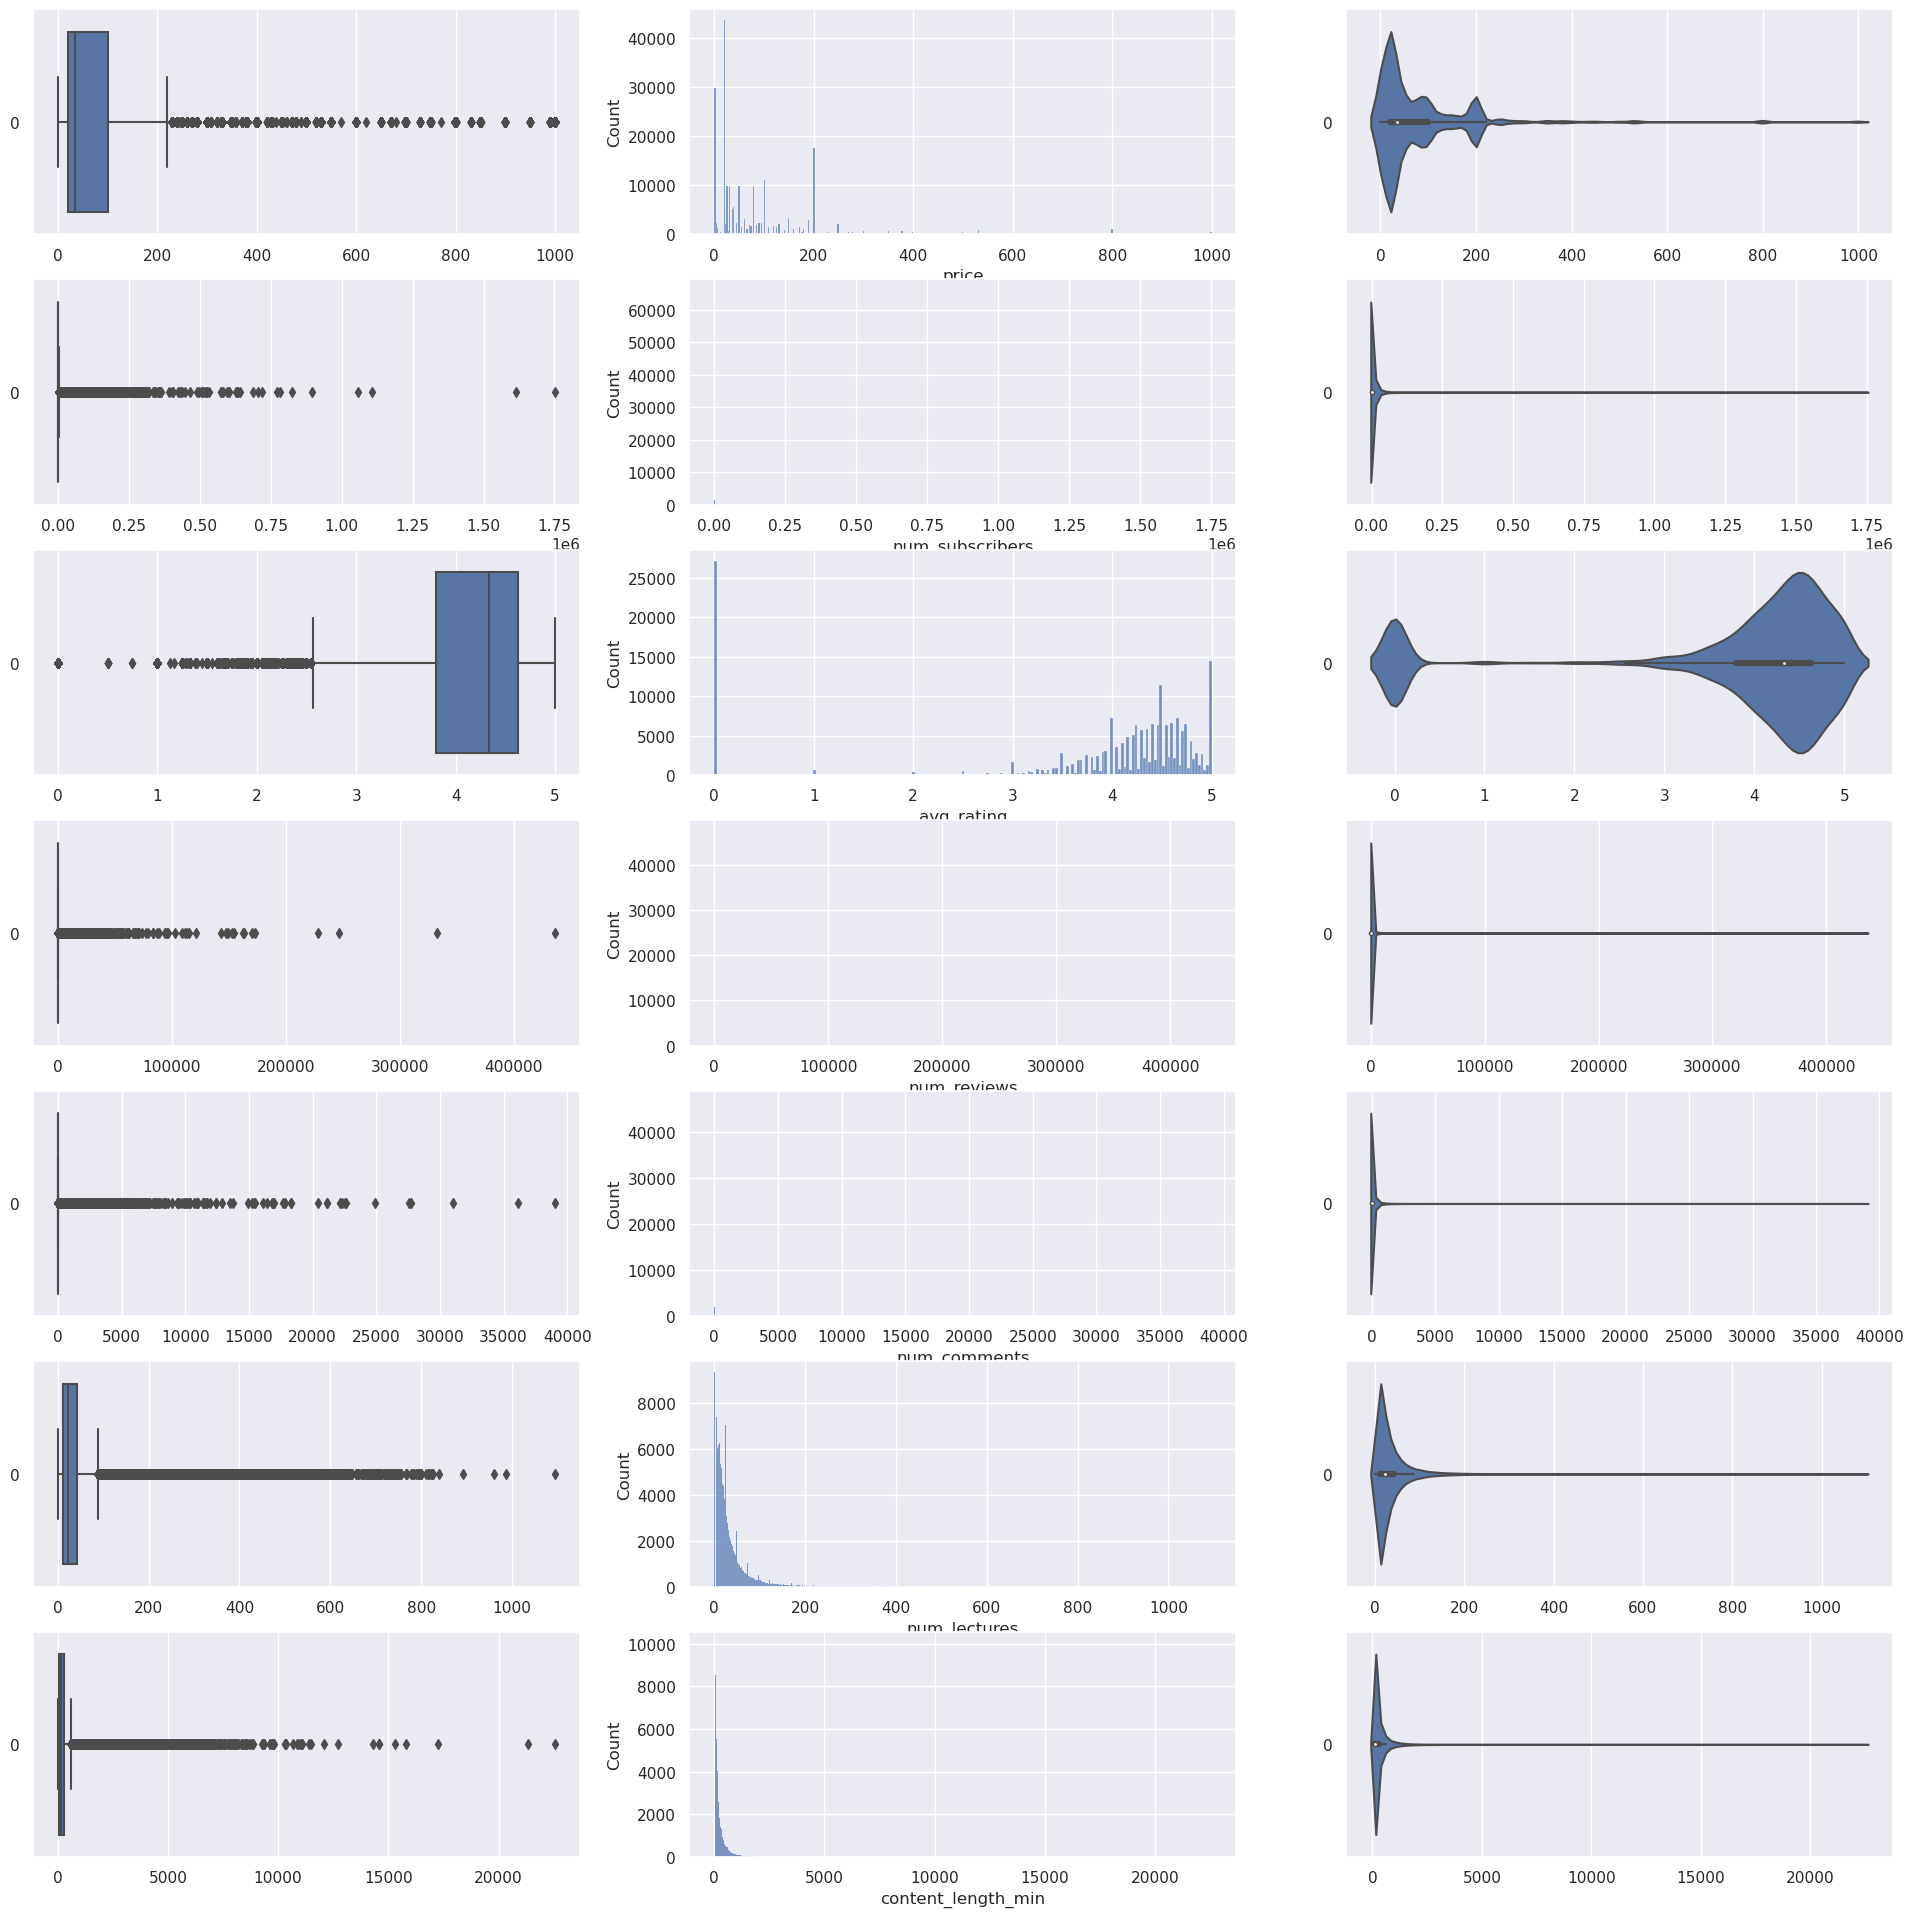

In [33]:
generate_numerical_visualization(CleanDataset)

In [34]:
RemovedOutlierDataset = remove_outliers(CleanDataset)

[price] total outliers: 11404
[num_subscribers] total outliers: 31288
[avg_rating] total outliers: 29601
[num_reviews] total outliers: 30255
[num_comments] total outliers: 28918
[num_lectures] total outliers: 16890
[content_length_min] total outliers: 19173


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
generate_numerical_visualization(RemovedOutlierDataset)